
<h1 style = "color: # 001a79;">Statistics Notebook</h1>

<hr style = "border-top: 1px solid #001a79;" />

##### Introduction to the Notebook
In this notebook we will look at different methods of statistcal learning and some methods and hypothesis used in statistical testing.  
The intenton of this notebook is is to concentrate more on the applications of statistical methods (the why and how) and less on the mathematical details. Although of couse the two do come hand in hand in some cases I will be attempting to show when and why a certain method has been used rather than the mathimathical reasoning of how the method works. Luckily as I am using pythton in this notebook it has numerous libraries (most notably scipy and statsmodels) that have many of these methods built in - so the trick is really to know when they are valuable, how they work is important, but not neccessarily required. 

##### Introdution to Stats
Statistical learning refers to a vast set of tools for understanding data.[[1]](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)  
Statistics itself, is the science of collecting, analyzing, presenting, and interpreting data. Historically statistics were used often by governments to gain insights onto economic activities, census information being the main sources of the data. However over the last century the growth of data colletion has grown exponentially with a huge explosion of the volume of data being collected over the past 30 years due to advances in computing, both in industry and everyday life. The value of the data available is now being recognised and the need to turn the large amounts of data available in many applied fields into useful information has stimulated both theoretical and practical developments in statistics. [[2]](https://www.britannica.com/science/statistics)

##### What is the difference between data and statistics?
Statistics and Data are two terms which are going to be used throughout this notebook so I belive it is important for anybody reading this to understand what I mean when I use those terms.  
While the terms ‘data’ and ‘statistics’ are often used interchangeably, there is an important distinction between them.  
Data are individual pieces of factual information recorded and used for the purpose of analysis. Data is the raw information from which statistics are created.   Statistics are the results of data analysis - its interpretation and presentation. In other words some computation has taken place that provides some understanding of what the data means. Statistics are often, though they don’t have to be, presented in the form of a table, chart, or graph. [[3]](https://libguides.macalester.edu/c.php?g=527786&p=3608657)


#### Importing Libaries

Before I go any further I am going to begin importing the libraries I intend to use in this notebook - this will begin with some of the libraries I know I will be using such as Math, Numpy, Pandas, Scipy, Statmodels and of course matplotlib, it will most likey grow as the notebook develops.

In [1]:
# Math Module
import math

# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# Statistical Methods
import scipy.stats as ss

# Alt Stats package
import statsmodels.stats.weightstats as stat

# plotting
import matplotlib.pyplot as plt

import itertools



### An introduction to an example of statistical problem solving
##### Lady Tasting Tea Problem

<img src="\Images\TeaPot.jpg" style="margin:auto"/>

The Lady Tasting Tea problem was first described by Ronald A. Fisher in his book *The Design of Experiments*.  
**A little background on Fisher:** Fisher was a British polymath who was active as a mathematician, statistician, biologist, geneticist, and academic. For his work in statistics, he has been described as "a genius who almost single-handedly created the foundations for modern statistical science"[[4]](https://en.wikipedia.org/wiki/Ronald_Fisher#cite_note-Hald98-7) and "the single most important figure in 20th century statistics".[[5]](https://en.wikipedia.org/wiki/Ronald_Fisher#cite_note-8)
Fisher is seen by many as one of the founders of modern day data analytics and is also responsible for one of the most famous datasets used in machine learning called the Iris Dataset. 
Although Fisher is seen as somewhat of a *god* in the field of data analytics and statistics, according to some sources his views on eugenics and race are disputed - todays society may not have been as kind to his genius, but his questionable ethical morals(to say the least) are not for debate in this notebook, but I feel it is worth mentioning.  

So back to a less contentious (but still worthy) debate - how to make a cup of tea.  
He described the problem as follows.

*"A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.*

*Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received."*

<img src="Images\Ronald_Fisher.jpeg" style="margin:auto"/>

###### <center>  Sir Ronald Aylmer Fisher (Photo from Rare Books & Special Collections, University of Adelaide)

## Number of Combinations

Let us investigate the number of ways in which the lady can arrange the eight cups into two groups of four.

The first group is the cups with milk first.

The second group is the cups with tea first.

Once we select four cups for the first group, the second group is made up of the remaining cups.

So, we only really need to count how many different ways there are to select four cups from eight.


To begin we give each of the eight cups a label from 0 to 7.

Note that the cups have no order in the experiment, we are labelling them with integers simply for convenience.

In [2]:
# The eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

Suppose the subject is trying to pick the four cups with milk in first.

If the subject is picking the cups randomly then they are randomly picking one of seventy different options.

By randomly, we mean that they can not really tell which cups have the milk in first.

Therefore they have only a probability of 1/70 of getting the right answer.

The number of ways of selecting four **unordered** items from eight is given by the Choose function in mathematics.  
**Unordered** is important here.
For example if we have 8 numbers: 1,2,3,4,5,6,7,8  
In an **unordered** selection 1,2,3,4 is the same choice as 4,3,2,1.  
In an **orderd** selection 1,2,3,4 and 4,3,2,1 are 2 separate choices.   

In [3]:
# This is the number of ways of selecting 4 objects from 8 (UNORDERED)
(8*7*6*5)/(4*3*2*1)

70.0

These possibilities can be enumerated using the combinations function from the itertools Python package.

It takes a list ***l*** of items and a number ***n***. It returns/generates each way of selecting ***n*** unordered items from ***l***.

In [4]:
poss = list(itertools.combinations(cups, 4))
poss

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

Above any combination of the first iteration the list 0,1,2,3 is not found anywhere else on the list.  
Eg. 0,1,2,3, and 1,0,2,3 and 3,0,2,1 and all other combinations of those 4 numbers are considerd the same choice.

### Hypotheses

In his book, Fisher describes the *null hypothesis*.  
It is the statement to be countered by the experiment.  
In this case it is the hypothesis that the subject cannot tell the difference between a cup of tea that had milk in it first and one that had the tea in it first.

**Null Hypothesis:** The subject can not tell if the cup had milk in it first or last.


Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true.  
If it is very unlikely, then we may reject the null hypothesis.  
Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.

**Alternative Hypothesis:** The subject can tell.

Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing.  
Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

In [5]:
# Only one of the 70 randomly selected possibilities is the desired result.
1.0 / 70.0

0.014285714285714285

# Exercise 1
<hr style = "border-top: 1px solid #001a79;" />

The above investigation shows about a 1.4% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

This code is adapted from https://stackoverflow.com/a/4941932/17170567

##### Prove out the original Tea test
<hr style = "border-top: 1px solid #001a79;" />

Below I am going to check the math module checks to see that the comb function will return the same number of combinations from itertools that I had used above - expected resut is 70.

In [6]:
#Number of ways of selecting 4 cups from 8
math.comb(8,4)

70

So now I know that I got the result I expeted I can prove that randomly choosing the correct combination has just over a 1.4% chance of occurence.

In [7]:
# Proof
(1.0 / math.comb(8, 4))*100

1.4285714285714286

##### Increase to 10 cups
<hr style = "border-top: 1px solid #001a79;" />

So now I am going to increase the number of cups to 10, as the more cups there are the more choices there are, which in turn will decrease the odds of the single correct choice occuring during a random selection.

In [8]:
#Number of ways of selecting 5 cups from 10
math.comb(10,5)

252

Here we see when we introduce 10 cups and require 5 are made with tea bag first and 5 with milk first, there are 252 combinations, far greater than the 70 combinations previously. This will greatly decrease the chance of the random selection being correct. Lets see.

In [9]:
#Probability of randomly selecting correct 5 cups is:
(1.0 / math.comb(10, 5))*100

0.3968253968253968

So if the experiment was done with 10 cups total, 5 with milk in first and 5 with tea in first the chance of selecting randomly is much less than 1% - it is actully just under 0.4% - It is possible that this is the correct answer.

##### Decrease to 9 cups
<hr style = "border-top: 1px solid #001a79;" />

The question is to find the **minimum** number of cups where the threshold is <= 1% so to I will now split the difference and develop the experiment to have 9 cups in total, 4 with milk first and 5 with tea first, or vice versa.

In [10]:
# Num of ways selecting 4 cups from 9
math.comb(9, 4)

126

In [11]:
# The Probability is then 
(1.0/math.comb(9, 4))*100

0.7936507936507936

Also less than 1% - round to .8%

In [12]:
# Note the number of ways of selecting 5 cups from 9 is also 126
# Proof
(1.0/math.comb(9, 5))*100

0.7936507936507936

##### The Correct Solution
<hr style = "border-top: 1px solid #001a79;" />

So of the 3 tests that I ran:  
- 8 cups, choose 4, the chance of randomly chosing the correct selection is **1.42%**.  
- 10 cups, choose 5, the chance of randomly chosing the correct selection is **0.39%**.   
- 9 cups, choose 4 or 5, the chance of randomly chosing the correct selection is **0.79%**.  

So we can definitively say that 9 cups is the minimum number of cups required so the chance of randomly making the correct selection is <=1%.  
 

# Exercise 2
<hr style = "border-top: 1px solid #001a79;" />

##### Use scipy's version of Fishers Exact Test to simulate the Lady Tasting Tea Problem

We know from the investigation above that the number of ways of selecting 4 cups from 8 is 70. 
Therefore the odds from a random selection the odds of choosing the 4 cups where the milk has been added first is 1/70 or 0.014285714285714285

In [13]:
# Show 1 divided by 70
1/70

0.014285714285714285

Here I am going to create a table to visualise the data - the code here is adapated from: https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593

In [14]:
#Create Table with Pandas
ar=np.array([[4, 0],[0, 4]])    
df=pd.DataFrame(ar, columns=["Milk_Guess", "Tea_Guess"])
df.index=["Milk_Poured", "Tea_Poured"] 
df 

,Milk_Guess,Tea_Guess
Milk_Poured,4,0
Tea_Poured,0,4


In [15]:
# Add the marginal totals and the grand total
df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Milk_Guess,Tea_Guess,Row_Total
Milk_Poured,4,0,4
Tea_Poured,0,4,4
Column_Total,4,4,8


First I want to calculate the expected values for each cell in our contingency table. The expected values represent the numbers that should be found in each cell of the table if there’s no association between the two variables “Guess” and “Poured”. For each cell we calculate its expected value by multiplying its respective Row_Total with its respective Column_Total and finally divide by the grand total. In this case that would be **(4/8) * (4/8) * 8** *or* **(4*4) / 8**

In [16]:
# Calculating Expected value in each cell
(4*4) / 8

2.0

This test is a little obvious as with 4 choices out of 8 cups the odds at random would be you would get two right and two wrong, but if you used odd numbers or skewed the data by only filling 3 cups with milk first and 5 with tea first you would get floating numbers as your answers

In [17]:
#Create Table with Pandas
ar=np.array([[5, 0],[0, 3]])    
df=pd.DataFrame(ar, columns=["Milk_Guess", "Tea_Guess"])
df.index=["Milk_Poured", "Tea_Poured"] 
df 

,Milk_Guess,Tea_Guess
Milk_Poured,5,0
Tea_Poured,0,3


In [18]:
# Add the marginal totals and the grand total
df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Milk_Guess,Tea_Guess,Row_Total
Milk_Poured,5,0,5
Tea_Poured,0,3,3
Column_Total,5,3,8


Here when we multiply the respective Row_Total with its respective Column_Total and divide by the grand total the formula for the expected outcome for each figure would be (5/8) * (3/8) * 8 or (5*3) / 8

In [19]:
# Calculating Expected value in each cell
(5*3) / 8

1.875

So now we have the expected value for each cell (we are going back to the **(4*4) / 8** scenario as that was the original question).
We will now try to use the fisher_exact method from scipy.stats to get the value of the chances of 4 random choices picking the all 4 of exact right cups (tea first is the correct way - I dont care what anyone says!!)

In [20]:
# Run the Fisher_exact method
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

In [21]:
#This is my data
data = [[4,0],[0,4]]

In [22]:
# Running the fisher exact method using the data from my original table
ss.fisher_exact(data)

(inf, 0.028571428571428536)

So here I was expecting to get the value of 1/70 or 0.014285714285714285 to be exact. However as you can see the figure produced from the code above does not match, however it is suspisiously almost exactly double what I expected (beyond 10 decimal places). So here I went back to the scipy.stats Fisher Exact Test documentation, see link here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html  
From the documentation I could see that there were numerous values that defines the hypothesis using the "alternative" parameter.

 - ‘two-sided’: the odds ratio of the underlying population is not one **(THIS IS THE DEFAULT IF NO VALUE IS DECLARED)**
 - ‘less’: the odds ratio of the underlying population is less than one
 - ‘greater’: the odds ratio of the underlying population is greater than one

Now we know that the formuala for the odds ratio is:

<img src="Images\odds_r.jpg" style="margin:auto"/>


However, because we know the input data has a 0 input, this will return inf (infinty) for the odds ratio.  

*"If you have an infinite odds in the denominator, then your odds ratio is zero. If you have a zero odds in the denominator, then your odds ratio is infinite."* [[6]](http://blog.pmean.com/zero-or-infinity/) 

Now I am not a mathematian by any means, in my mind infinity is a kind of mythical unachievable entity, however from my limited understanding and research this is the clearest explanation I found: 

*"Infinity is not a real number.  
Infinity is a number, in other contexts. For example, in the Extended Real Numbers, it is a number. This set is of a huge importance for subjects like measure theory and integration theory. In the Ordinals or in the Cardinals (used extensively in set theory), infinity isn't just a number, it is an entire range of numbers.  
And yes, in all of these systems, infinity is greater than one."*[[7]](https://math.stackexchange.com/questions/2387286/is-infinity-larger-than-1)

If we take  this as true and look at the 3 paramaters, that would mean that the *"greater"* parameter should be applied to the data for this example of the Tea Test.

In [23]:
oddsr, p = ss.fisher_exact(data, alternative='greater')

In [24]:
# Odds ratio returning infinity as expected and we are now returing the 0.014285... (1/70)
oddsr, p

(inf, 0.014285714285714268)

#### *Bonus Excercise for 1.1:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

In [ ]:
ss.fisher_exact([[7,1],[1,7]], alternative='greater')

In [ ]:
import numpy as np
import pandas as pd
import scipy.special

In [ ]:
#Create Table with Pandas
ar=np.array([[4, 0],[0, 4]])    
df=pd.DataFrame(ar, columns=["Milk_Guess", "Tea_Guess"])
df.index=["Milk_Poured", "Tea_Poured"] 
df 

In [ ]:
n=df2.at["Column_Total", "Row_Total"]  # grand total 

exp=df2.copy()               # create dataframe with expected frequencies
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        # round expected values to nearest hundredths:
        v= (((df2.at[x, "Row_Total"]) * (df2.at["Column_Total", y])   )   /n ).round(2) 
        exp.at[x,y]=float(v)

exp

In [ ]:
def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

p(1) # if we try "a=1" we get the following probability ... 

In [ ]:
p_observed=p(7) # In our contingency table, a was equal to 7.

p_list=[]
for i in range(int(df2.iloc[0,2])  + 1  ): # calculate p(a) for every possible table we can get given the fixed margins...
#... this ranges from "9 choose 0" to "9 choose 9" so we should get 10 possible tables and their respective probabilities..
    if p(i)<=p_observed:
        p_list.append(p(i))     # append these probabilites to p_list only if <= p_observed
        
p_val=np.sum(p_list) # the sum of this list corresponds to the p-value 
p_val 

# The t-Test

**A *t-Test* is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related.**  
T-tests are used when the data sets follow a normal distribution and have unknown variances, like the data set recorded from flipping a coin 100 times.  

##### Key Takeaways
 - A t-test is an inferential statistic used to determine if there is a statistically significant difference between the means of two variables.  
 - The t-test is a test used for hypothesis testing in statistics.  
 - Calculating a t-test requires three fundamental data values including the difference between the mean values from each data set, the standard deviation of each group, and the number of data values.  
 - T-tests can be dependent or independent.  
 
 ##### Assumptions of a **t-Test**
Four assumptions are made while using a t-test.  
 - The data collected must follow a continuous or ordinal scale, such as the scores for an IQ test.  
 - The data is collected from a randomly selected portion of the total population.  
 - The data will result in a normal distribution of a bell-shaped curve.  
 - Equal or homogenous variance exists when the standard variations are equal.  
[Investopedia](https://www.investopedia.com/terms/t/t-test.asp)

### Simulated Data

Here I am creating a fake dataset with specfic proparties to investigate numerical methods.

In [36]:
# Parameters for two different sets of numbers
m_a, s_a, m_b, s_b = 1.2, 0.4, 2.0, 0.4

# Sample size
N=40

# Create two lists of numbs nased on bell-shaped pabability curves.
a = np.random.normal(loc = m_a, scale = s_a, size = N)
b = np.random.normal(loc = m_b, scale = s_b, size = N)

# Both Samples in one Dataframe(DF)
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value':np.hstack([a,b])})

# Look at the nums
df


,Category,Value
0,A,0.895411
1,A,0.865902
2,A,0.905532
3,A,0.732474
4,A,1.871061
...,...,...
75,B,2.406934
76,B,2.737405
77,B,2.409695
78,B,1.300972


This has created a dataframe with 2 columns (Category and Value) - 40 of the numbers are **Category A** (Mean is 1.2(centered around 1.2) and scale is 0.4) and 40 are **Category B** (Mean is 2.0(centered around 2.0) and scale is 0.4). However it is difficult to draw any conclusions around this data so lets visualize it. 

### Visualisation

Here I will use a catplot from the python package seaborn to show the overlap between the two sets of data. (**A** and **B**)

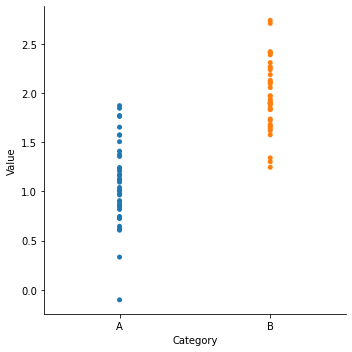

In [38]:
# Display DF in Catplot
sns.catplot(x = 'Category', y = "Value", jitter = False, data=df)

We can see from the catplot that the majority of the numbers from **A** are centered around 1.2(normal distribution - bell curve) and from **B** they are centered around 2.0 - this is as we would have expected, as that is how we set up the data.  
We can see there is significent overlap betweent the 2 lines - mostly between the values of 1.4 and 1.8.  
Now I know the data is different as I created it  - however it would be hard to convince my boss or whoever as to how significantly different it is based on the image above, as there is so much overlap.

One way to show the diffence in this data (we are now assuming that we didnt create it - where/how A and B were created is "unknown") is by using a test called the t-Test.  (**Not Tea Test, t-Test!!**)

#### t-Test Example using built in packages

So first question is how did I know to run this test. Well I simply googled ***"best test to compare 2 sets of data".***  
The first result i got was this: 


<img src="Images\t_test_search.PNG" style="margin:auto"/>


From there I searched for the t-test in python and began to see was it applicable to my data.  
From a brife search it was clear a lot or research and work had already been done on this topic.  
It was now a matter of finding the correct type of **t-Test** that was relavent to me.

There are a number of types of t-test:
 - ttest_ind: For two independent sets of data. **(This is the one I will be using)**
 - ttest_1samp:When there is only one sample of data.
 - ttest_rel: When the two data sets are related in some way.

Below I am going to run the **t-Test** using two different python libaries, just to confirm that the results are pretty much the same (May be slight discrpancy down past 9 or 10 decimal places depending on how the calculations are done in the background).

In [43]:
# Scipy.stats t-Test
# See code and documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value:{p_ss}")
print(f"P_scipy: {p_ss:0.2f}")


t-value: -10.275846374037759	p-value:3.732386251854009e-16
P_scipy: 0.00


In [44]:
#Stats model version
# See code and documentation here: https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html#statsmodels.stats.weightstats.ttest_ind
t_sm, p_sm, d_sm = stat.ttest_ind(a,b)
print (f"t-value:{t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value:-10.275846374037762	p-value: 3.7323862518539555e-16	Deg Free: 78.0
P_statsmodels: 0.00


Both retrun a t-value and p-value, the stats model function also returns a degree value(Degree value is the **Degrees of Freedom**, (Number of values in **a** + Number of values in **b**) - 2  In this case:(40+40)-2 = 78.

So as we can see the results are the same up to around 10 decimal places for the t-value and the p-value.  

#### t-Test Example manually done

In [ ]:
# Calcualte the t statistic by hand

#Lenghth of the arrays
n1 = len(a)
n2 = len(b)

# Means of the samples
m1 = np.mean(a)
m2 = np.mean(b)

# Sample Standard Deviations
s1 = np.sqrt(np.sum((a - m1)**2) / (n1-1))
s2 = np.sqrt(np.sum((b - m2)**2) / (n2-1))

df = n1 + n2 - 2
#print (df)

In [ ]:

sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
t = (m1-m2) / (np.sqrt(sp2)* np.sqrt(1.0/n1 + 1.0/n2))
t

### Populations (Set of Numbers)
t-Tests perform calculations aon the samples from two populations to test whether the populations are likely similar.  

In the real world we only see the samples and we cannot see the populations

In [ ]:
# Creatate a plot with the following values
x = np.linspace(-2.0, 4.0, 1000)

# Plot 2 different populations on one axis
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

### Critical Value

The critical value is used to make a decision regarding the calculation of the *t* statistic from the samples.

If the probability of seeing such a *t* value given the hypothesis that there is no difference between the means is low, then the data is suggesting that you should reject the hypothesis

In [ ]:
# Build the plot as an example

x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d_sm)
tf = pd.DataFrame({'x':x_t, 't': t})

tcrit = abs(ss.t.pdf(0.025, d_sm))
one = tf[tf['x']>= tcrit]
two = tf[tf['x']<= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor = 'red')
ax.fill_between(two['x'], two['t'], 0, facecolor = 'red')

plt.show()


### Type 1 Errors - False Positives


In [ ]:
# Run 10000 t-tests where the means are equal
# We should make the "wrong" decision (reject the hypothesis)(100*critical) per cent of the time.

trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc = m_a, scale = s, size = N)
    b = np.random.normal(loc = m_b, scale = s, size = N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 *(rejects / trials)
print (f"{typei:0.2f}%")

### Type 2 errors - False negatives
The chance of a false negative is harder to quantify.

It depends how close the means are.

In [ ]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc = m_a, scale = s, size = N)
    b = np.random.normal(loc = m_b, scale = s, size = N)
    if ss.ttest_ind(a, b)[1] > critical:
        dont = dont + 1

typeii = 100.0 *(dont / trials)
print (f"{typeii:0.2f}%")

### Paired Samples

Here we try a slightly different *t* test on repeated measures

In [ ]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

In [ ]:
drugA = dfsleep[dfsleep["group"]==1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

In [ ]:
drugB = dfsleep[dfsleep["group"]==2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

In [ ]:
ss.ttest_rel(drugA, drugB)

In [ ]:
ss.ttest_1samp(drugB-drugA, 0)

In [ ]:
stat.DescrStatsW(drugB-drugA).ttest_mean(0)

### Problems with multiple *t-Tests*

Suppose we want to compare 3 groups - can 3 *t-Tests* be run in parallel

In [ ]:
#Size of each sample
N=100

#Create 3 Samples
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

#Put Samples in a single df
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples
sns.catplot(x = 'Sample', y = 'Value', jitter = False, data = dfsamps)

In [ ]:
# t-Tests
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f} \tp_AC: {p_AC:.2f} \tp_BC: {p_BC:.2f}")

In [ ]:
# Run 1000 tests, remembering the Type I errors

falsepos = 0

for i in range (1000):
    A = np.random.normal(1.0, 0.2, N)
    B = np.random.normal(1.0, 0.2, N)
    C = np.random.normal(1.0, 0.2, N)
    t_AB, p_AB = ss.ttest_ind(A, B)
    t_AC, p_AC = ss.ttest_ind(A, C)
    t_BC, p_BC = ss.ttest_ind(B, C)
    if p_AB <= 0.05 or p_AC <= 0.05 or p_BC <= 0.05:
        falsepos = falsepos + 1

print (f"False Positive Rate: {falsepos / 10}%")

As you can see even with the critical value at 5% we are still getting false positisve at a much higher rate (I ran this around 20 times and it returned at a rate between 10.6-13.9% (mostly around the 11.5% mark)

### Analysis of Varience (ANOVA)

ANOVA can be used to avoid a higher Type 1 Error Rate

In [ ]:
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"F:{F:.2f} P:{P:.2f}")

In [ ]:
# Let's run 10000 ANOVAs where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.
# We expect to incorrectly reject the null hypothesis 5% of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the test.
    F, p = ss.f_oneway(sample1, sample2, sample3)
    # If any is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

### Exercise 3

Take the code from the Examples section of the scipy stats documentation for independent samples t-tests, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.



# Citations

1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021 - Second Edition). An Introduction to Statistical Learning. Springer New York, Page 1. https://www.statlearning.com/
2. R. Anderson, D. (2022, September 20). Statistics. https://www.britannica.com/science/statistics
3. Albertson, Aaron. “All Guides: Data Module #1: What Is Research Data?: Data and Statistics.” Libguides.macalester.edu, https://libguides.macalester.edu/c.php?g=527786&p=3608657.
4. Hald, Anders (1998). A History of Mathematical Statistics. New York: Wiley. ISBN 978-0-471-17912-2.
5. Efron, Bradley (1998), "R. A. Fisher in the 21st century", Statistical Science, 13 (2): 95–122, doi:10.1214/ss/1028905930